# Nash equilibrium enumeration algorithms

This notebook benchmarks two Nash equilibrium enumeration algorithms in `quantecon.game_theory`,
namely, `support_enumeration` and `vertex_enumeration`.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon.game_theory as gt
from quantecon import tic, tac, toc

In [3]:
def benchmark_enumeration(nums_actions, n_trials=3, random_state=None):
    """
    Benchmark support_enumeration and vertex_enumeration on randomn games.
    
    """
    support_times = []
    vertex_times = []
    
    for i in range(n_trials):
        g = gt.random_game(nums_actions, random_state=random_state)  # Generate game once
        
        tic()
        NEs = gt.support_enumeration(g)
        elapsed = toc(verbose=False)
        support_times.append(elapsed)
        print(f"support_enumeration - Trial {i+1}: {elapsed:.4f} sec, {len(NEs)} equilibria")
        
        tic()
        NEs = gt.vertex_enumeration(g)
        elapsed = toc(verbose=False)
        vertex_times.append(elapsed)
        print(f"vertex_enumeration - Trial {i+1}: {elapsed:.4f} sec, {len(NEs)} equilibria")
    
    return np.mean(support_times), np.mean(vertex_times)

Warm-up:

In [4]:
n = 3
g = gt.random_game((n, n))
print(gt.support_enumeration(g))
print(gt.vertex_enumeration(g))

[(array([0.        , 0.31241247, 0.68758753]), array([0.03787296, 0.96212704, 0.        ]))]
[(array([0.        , 0.31241247, 0.68758753]), array([0.03787296, 0.96212704, 0.        ]))]


Benchmarking:

In [5]:
game_sizes = [(n, n) for n in range(7, 14)]
n_trials = 3  # Number of samples for each size
seed = 1234

rng = np.random.default_rng(1234)
support_times = []
vertex_times = []

for size in game_sizes:
    print(f"\nBenchmarking game size: {size}")
    avg_support, avg_vertex = benchmark_enumeration(size, n_trials=n_trials, random_state=rng)
    support_times.append(avg_support)
    vertex_times.append(avg_vertex)

print("\nBenchmarks complete.")


Benchmarking game size: (7, 7)
support_enumeration - Trial 1: 0.0007 sec, 9 equilibria
vertex_enumeration - Trial 1: 0.0007 sec, 9 equilibria
support_enumeration - Trial 2: 0.0007 sec, 11 equilibria
vertex_enumeration - Trial 2: 0.0004 sec, 11 equilibria
support_enumeration - Trial 3: 0.0007 sec, 15 equilibria
vertex_enumeration - Trial 3: 0.0003 sec, 15 equilibria

Benchmarking game size: (8, 8)
support_enumeration - Trial 1: 0.0029 sec, 5 equilibria
vertex_enumeration - Trial 1: 0.0004 sec, 5 equilibria
support_enumeration - Trial 2: 0.0029 sec, 3 equilibria
vertex_enumeration - Trial 2: 0.0004 sec, 3 equilibria
support_enumeration - Trial 3: 0.0031 sec, 17 equilibria
vertex_enumeration - Trial 3: 0.0006 sec, 17 equilibria

Benchmarking game size: (9, 9)
support_enumeration - Trial 1: 0.0125 sec, 3 equilibria
vertex_enumeration - Trial 1: 0.0008 sec, 3 equilibria
support_enumeration - Trial 2: 0.0141 sec, 13 equilibria
vertex_enumeration - Trial 2: 0.0016 sec, 13 equilibria
support_

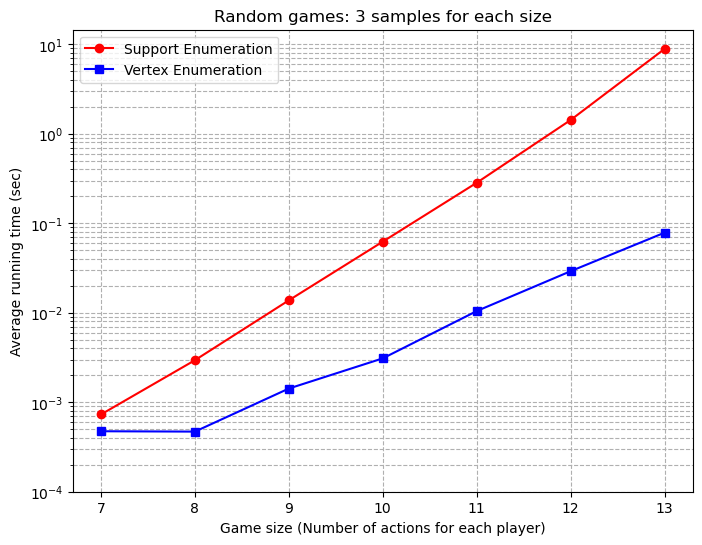

In [6]:
# Plot results from benchmark
sizes = np.array([size[0] for size in game_sizes])

plt.figure(figsize=(8, 6))
plt.plot(sizes, support_times, 'ro-', label='Support Enumeration')
plt.plot(sizes, vertex_times, 'bs-', label='Vertex Enumeration')
plt.yscale('log')
yticks_range = np.arange(int(np.floor(np.log10(min(support_times + vertex_times)))),
                         int(np.ceil(np.log10(max(support_times + vertex_times)))) + 1)
plt.yticks(10.0 ** yticks_range)
plt.xticks(sizes)
plt.xlabel('Game size (Number of actions for each player)')
plt.ylabel('Average running time (sec)')
plt.title(f'Random games: {n_trials} samples for each size')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

## Numbers of equilibria of covariance games

By running `vertex_enumeration`, we count the number of Nash equilibria of covariance games
for different values of the covariance parameter $\rho$.

In [7]:
n = 10  # Number of actions for each player
num_samples = 300
seed = 1234

rng = np.random.default_rng(seed) 
rho_values = rng.uniform(-1, 1, num_samples)
equilibria_counts = []

for rho in rho_values:
    g = gt.covariance_game((n, n), rho, random_state=rng)
    NEs = gt.vertex_enumeration(g)
    equilibria_counts.append(len(NEs))
    print('.', end='')

............................................................................................................................................................................................................................................................................................................

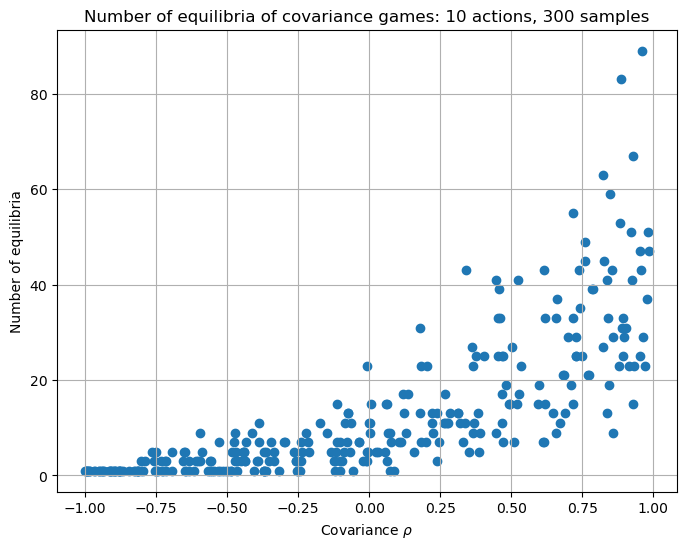

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(rho_values, equilibria_counts)
plt.xlabel(r'Covariance $\rho$')
plt.ylabel('Number of equilibria')
plt.title(f'Number of equilibria of covariance games: {n} actions, {num_samples} samples')
plt.grid(True)
plt.show()

In [9]:
import platform
import psutil
import sys

print(f"OS: {platform.system()} {platform.release()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")
print(f"CPU Cores: {psutil.cpu_count(logical=False)} (Physical), {psutil.cpu_count(logical=True)} (Logical)")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Python Version: {sys.version.split()[0]}")
print(f"QuantEcon.py Version: {__import__('quantecon').__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"SciPy Version: {__import__('scipy').__version__}")
print(f"Numba Version: {__import__('numba').__version__}")

OS: Darwin 24.3.0
Machine: arm64
Processor: arm
CPU Cores: 14 (Physical), 14 (Logical)
Total RAM: 48.0 GB
Python Version: 3.12.9
QuantEcon.py Version: 0.8.0
NumPy Version: 2.1.3
SciPy Version: 1.15.1
Numba Version: 0.61.0
